In [45]:
%matplotlib inline

from IPython.display import clear_output

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 

import numpy as np

from numpy import log, dot, e
from numpy.random import rand

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Get Dataset

In [3]:
# get bag of words
data = pd.read_csv('Dataset/BOW/test.csv', header = None).values

# get labels
dataset = pd.read_csv('Dataset/train.csv')[['text', 'label']]
dataset.dropna(inplace = True)
dataset.reset_index(drop = True, inplace = True)
label = dataset['label'].head(len(data)).values

In [12]:
data.shape

(500, 20003)

In [13]:
label.shape

(500,)

## Logistic Regression Model

In [195]:
class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def fit(self, X, y, epochs=100, lr=0.05):        
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            
            clear_output(wait=True)
            print(f'{_ + 1}/{epochs}')
            
        self.weights = weights
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [196]:
lrModel = LogisticRegression()

In [197]:
xTrain, xTest, yTrain, yTest = train_test_split(data, label, test_size = 0.2, random_state = 0)

In [211]:
lrModel.fit(xTrain, yTrain, 1000)

100/100


In [214]:
pred = lrModel.predict(xTrain)

In [215]:
print(f'Accuracy: {(len([x for i, x in enumerate(pred) if x == yTrain[i]]) / len(yTrain)) * 100}%')

Accuracy: 49.25%


In [212]:
predTest = lrModel.predict(xTest)

In [213]:
print(f'Accuracy: {(len([x for i, x in enumerate(predTest) if x == yTest[i]]) / len(yTest)) * 100}%')

Accuracy: 45.0%


### Evaluation

Text(0.5, 1.0, 'Confusion Matrix, Logistic Regression')

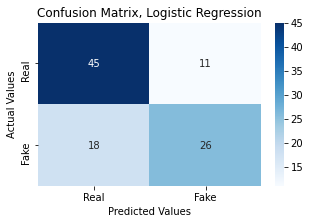

In [206]:
cm = confusion_matrix(yTest,predTest)

plt.figure(figsize = (5,3))
sn.heatmap(data = cm, annot = True, cmap = "Blues", xticklabels = ['Real', 'Fake'], yticklabels = ['Real', 'Fake'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix, Logistic Regression')

In [210]:
len([i for i in yTrain if i == 1])

195

In [218]:
pd.DataFrame(xTrain)

,0,1,2,3,4,5,6,7,8,9,...,19993,19994,19995,19996,19997,19998,19999,20000,20001,20002
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
397,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
xTrain.shape

(400, 20003)

In [220]:
dot([1,2,3], [2,3,4])
# 1 x 2 + 2 x 3 + 3 x 4

20